# Machine Learning 201

## Ridge Regression 

* Amaç hata kareler toplamını minimize eden katsayıları, bu katsayılara bir ceza uygulayarak bulmaktır.

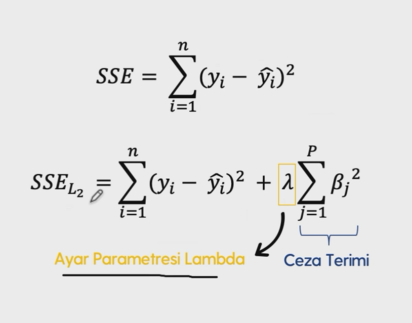

* Aşırı öğrenmeey karşı direçlidir.
* Yanlıdır fajat varyansı düşüktür. (Bazen yanlı modelleri daha çok tercih ederiz.)
* Çok fazla parametre olduğunda EKK'ya (klasik regresyon) göre daha iyidir.
* Çok boyutluluk lanetine karşı çözüm sunar. (değişken sayısının gözlem sayısından fazla olması durumu)
* Çoklu doğrusal bağlantı problemi olduğunda etkilidir. (bağımsız değişkenler arasında yüksek korelasyon olma durumu)
* Tüm değişkenler ile model kurar. İlgisiz değişkenleri modelden çıkarmaz, katsayılarını sıfıra yaklaştırır.
* λ kritik roldedir. İki terimin (formüldeki) göreceli etkilerini kontrol etmeyi sağlar.
* λ için iyi bir değer bulunması önemlidir. Bunun için CV yöntemi kullanılır.

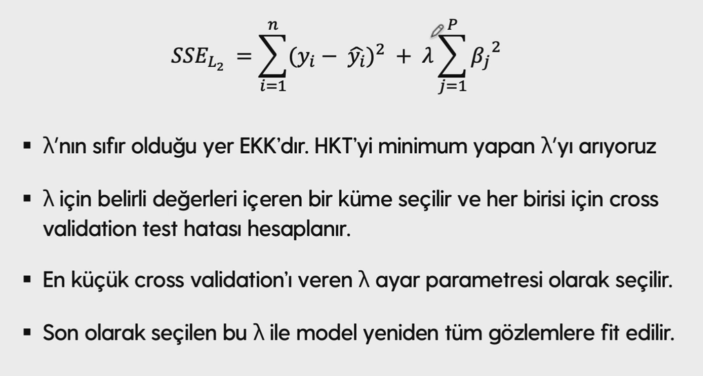

### Model 

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # kategorik değişkenleri dummy değişkenlere dönüştürdük
y = df["Salary"] # bağımlı değişken
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis = 1) # bağımsız değişkenler
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [3]:
dms

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [5]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [6]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [7]:
ridge_model

Ridge(alpha=0.1)

In [8]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [9]:
ridge_model.intercept_

-4.578626905723581

In [10]:
np.linspace(10,-2,100) * 0.5

array([ 5.        ,  4.93939394,  4.87878788,  4.81818182,  4.75757576,
        4.6969697 ,  4.63636364,  4.57575758,  4.51515152,  4.45454545,
        4.39393939,  4.33333333,  4.27272727,  4.21212121,  4.15151515,
        4.09090909,  4.03030303,  3.96969697,  3.90909091,  3.84848485,
        3.78787879,  3.72727273,  3.66666667,  3.60606061,  3.54545455,
        3.48484848,  3.42424242,  3.36363636,  3.3030303 ,  3.24242424,
        3.18181818,  3.12121212,  3.06060606,  3.        ,  2.93939394,
        2.87878788,  2.81818182,  2.75757576,  2.6969697 ,  2.63636364,
        2.57575758,  2.51515152,  2.45454545,  2.39393939,  2.33333333,
        2.27272727,  2.21212121,  2.15151515,  2.09090909,  2.03030303,
        1.96969697,  1.90909091,  1.84848485,  1.78787879,  1.72727273,
        1.66666667,  1.60606061,  1.54545455,  1.48484848,  1.42424242,
        1.36363636,  1.3030303 ,  1.24242424,  1.18181818,  1.12121212,
        1.06060606,  1.        ,  0.93939394,  0.87878788,  0.81

In [11]:
lambdalar = 10**np.linspace(10,-2,100) * 0.5

In [12]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [13]:
ridge_model = Ridge()
katsayilar = []

for i in lambdalar :
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)

In [14]:
katsayilar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

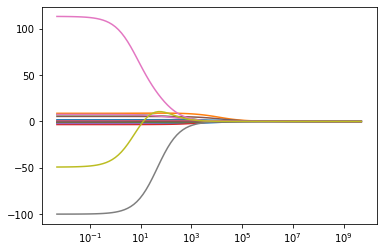

In [15]:
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale("log")


### Tahmin 

In [16]:
ridge_model = Ridge().fit(X_train, y_train)

In [17]:
y_pred = ridge_model.predict(X_train)

In [18]:
y_pred[0:10] # tahmin edilen değerler

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [19]:
y_train[0:10] # gerçek y değerleri

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [20]:
# train hatası (genellikle model tuning bölümlerinde en iyi parametreleri seçmek için cv yöntemini model tuning bölümlerinde train setlerine uygulayacağız)
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

289.34470696006565

In [21]:
# cv (daha doğru hata)
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

351.39315856063865

In [22]:
# test hatası
y_pred = ridge_model.predict(X_test)

In [23]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

356.80829057302276

### Model Tuning 

In [71]:
ridge_model = Ridge(1).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test) # test setinin bağımlı değişkeninin tahmin ettik
np.sqrt(mean_squared_error(y_test, y_pred))

356.80829057302276

In [72]:
np.random.randint(0,1000,100)

array([240, 757, 447, 768, 512, 799, 115, 107, 336, 994, 318, 110, 517,
       883, 979, 851, 775, 331, 599, 763, 669, 900,  10, 966, 240, 305,
       220,  62, 116, 155, 943, 188, 487, 628, 806, 628, 709, 960, 744,
       589, 435, 344, 677,  15, 129, 736,  83, 244, 598,  76, 215, 713,
       752, 588, 906, 634, 989, 291, 579, 388, 488, 382, 218, 451, 673,
       946, 761, 415, 297, 687, 690, 512, 782, 217, 597, 111, 554, 738,
       954,  57,  41, 228, 410, 919, 530, 784, 246, 982, 782, 567, 480,
       710, 101, 747, 608, 444,  32, 680, 418, 749])

In [73]:
lambdalar1 = np.random.randint(0,1000,100)

In [74]:
lambdalar2 = 10**np.linspace(10,-2,100) * 0.5

In [75]:
ridgecv = RidgeCV(alphas = lambdalar2, scoring = "neg_mean_squared_error", cv = 10, normalize = True)

In [76]:
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [77]:
ridgecv.alpha_ # optimum parametre değeri

0.7599555414764666

In [78]:
# final modeli

In [79]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [80]:
y_pred = ridge_tuned.predict(X_test) # test setinin bağımlı değişkeninin tahmin ettik
np.sqrt(mean_squared_error(y_test, y_pred))

356.85830472715054

In [81]:
ridgecv = RidgeCV(alphas = lambdalar1, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([703, 322, 577, 265, 990, 500, 809, 789, 816,  77,  75, 236, 613,
       996, 305, 211, 917, 584, 622,  50, 556, 203,  35, 251, 260, 175,
       153,  77, 659, 552, 122, 533, 929, 203, 990, 621, 279, 734, 350,
       700, 514, 408, 485, 526,  10,  46, 967, 913, 960, 905, 857, 219,
        25, 347, 767, 168, 618, 454, 864, 498,  32, 946, 403, 530,  79,
       981, 816, 577, 164, 901,  80, 172, 415, 929, 586, 297, 742,  47,
       800, 232, 859, 985, 454, 702, 810, 668, 975, 978, 867, 172, 244,
       734, 233, 488, 996, 781, 519, 944,  62, 606]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [85]:
ridgecv.alpha_

10

In [83]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [84]:
y_pred = ridge_tuned.predict(X_test) # test setinin bağımlı değişkeninin tahmin ettik
np.sqrt(mean_squared_error(y_test, y_pred))

356.305485272174